In [7]:
# identifying secret number (6 bit) : 101001 (human 64, bit, 6, quantum  1 tries)
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [26]:
secretnumber = '101001001110001'

In [27]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
            circuit.cx(ii, len(secretnumber))

circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

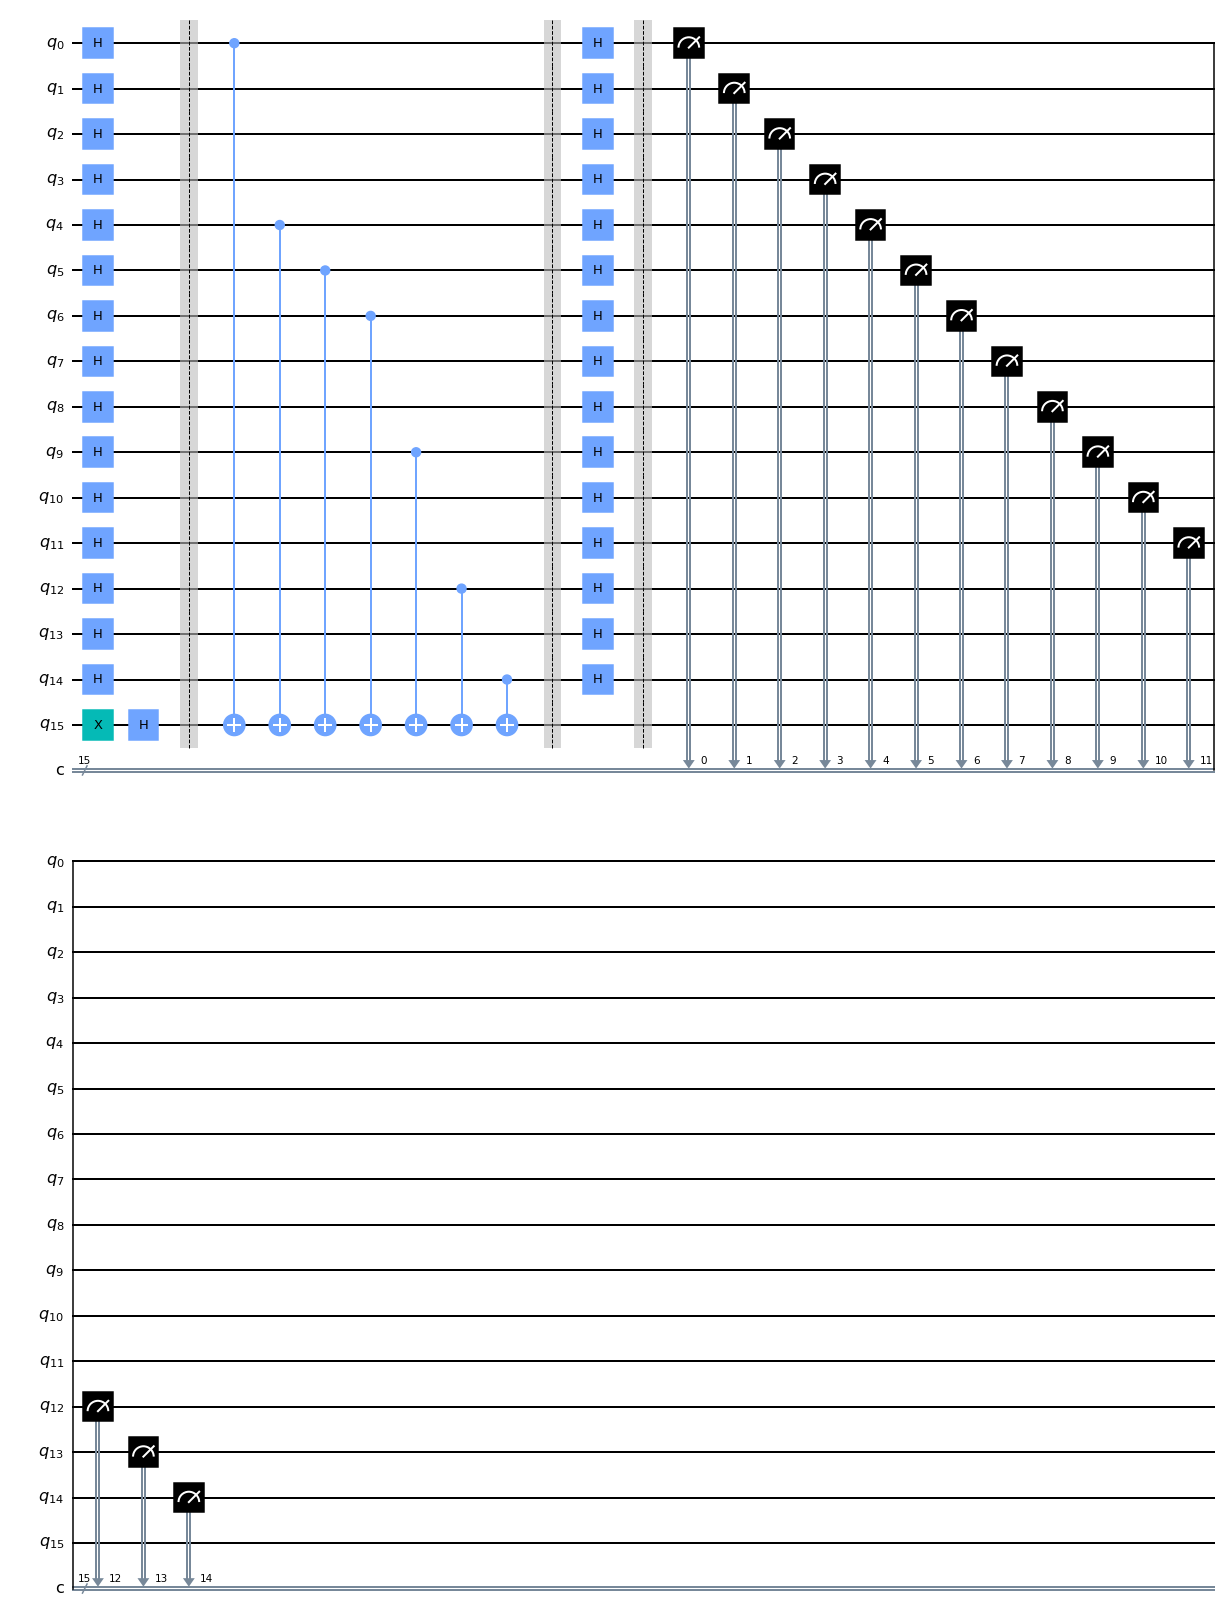

In [28]:
circuit.draw(output='mpl')

In [29]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101001001110001': 1}
